In [6]:
import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
sns.set()

In [7]:
my_history = pd.read_csv('me.csv')

In [8]:
my_history['Date'] = pd.to_datetime(my_history['Date'])
my_history['Year'], my_history['Month'] = my_history['Date'].dt.year, my_history['Date'].dt.month_name()
my_history['Day'] = my_history['Date'].dt.day
my_history['Day_of_week'] = my_history['Date'].dt.day_name()

In [9]:
show_details = my_history.Title.str.split(":",expand=True,n=2)
my_history['show_name'] = show_details[0]
my_history['season'] = show_details[1]
my_history['episode_name'] = show_details[2]

In [10]:
my_history['show_type'] = my_history.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show' , axis=1)
my_history

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,Friends: Season 7: The One with All the Cheese...,2020-11-29,2020,November,29,Sunday,Friends,Season 7,The One with All the Cheesecakes,TV Show
1,Red Joan,2020-11-29,2020,November,29,Sunday,Red Joan,None,None,Movie
2,The Age of Adaline,2020-11-29,2020,November,29,Sunday,The Age of Adaline,None,None,Movie
3,Mismatched: Season 1: Games We Play,2020-11-26,2020,November,26,Thursday,Mismatched,Season 1,Games We Play,TV Show
4,Mismatched: Season 1: It's Not a Date,2020-11-26,2020,November,26,Thursday,Mismatched,Season 1,It's Not a Date,TV Show
...,...,...,...,...,...,...,...,...,...,...
1779,Black Mirror: Season 4: USS Callister,2019-06-02,2019,June,2,Sunday,Black Mirror,Season 4,USS Callister,TV Show
1780,Stranger Things: Chapter One: The Vanishing Of...,2019-04-02,2019,April,2,Tuesday,Stranger Things,Chapter One,The Vanishing Of Will Byers,TV Show
1781,Riverdale: Season 3: Chapter Forty-Six: The Re...,2019-03-02,2019,March,2,Saturday,Riverdale,Season 3,Chapter Forty-Six: The Red Dahlia,TV Show
1782,Riverdale: Season 3: Chapter Forty-Five: The S...,2019-02-02,2019,February,2,Saturday,Riverdale,Season 3,Chapter Forty-Five: The Stranger,TV Show


In [11]:
#Saving the dataframe as csv
my_history.to_csv('g-history.csv', index=False)

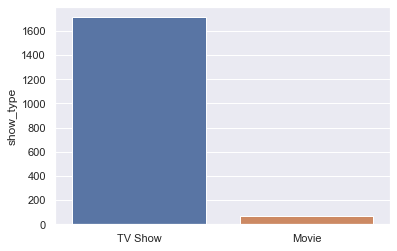

In [12]:
ax = sns.barplot(x=my_history["show_type"].value_counts().index, y=my_history["show_type"].value_counts())

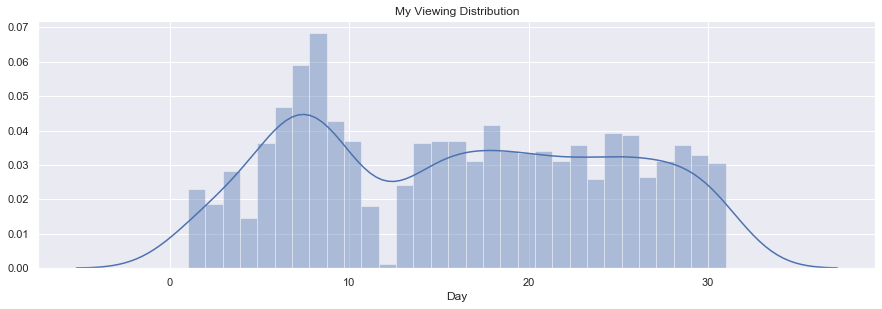

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("My Viewing Distribution")
ax = sns.distplot(my_history['Day'],bins=31)

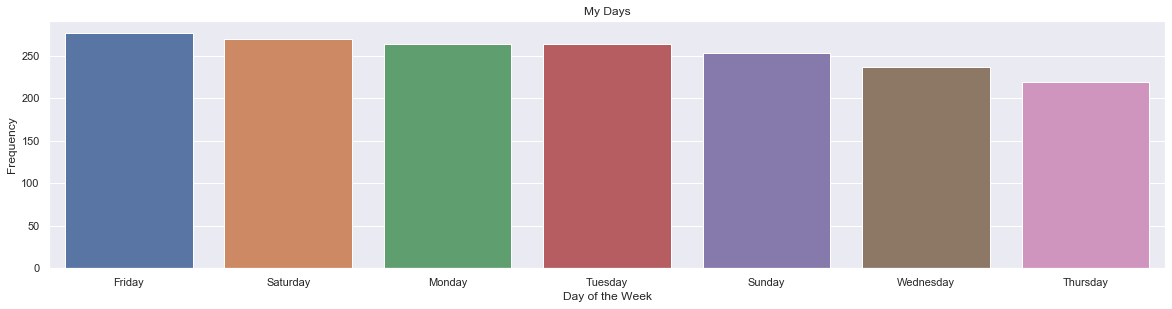

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=my_history["Day_of_week"].value_counts().index, y=my_history["Day_of_week"].value_counts())
plt.title("My Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

plt.savefig('02-Daywise.png')


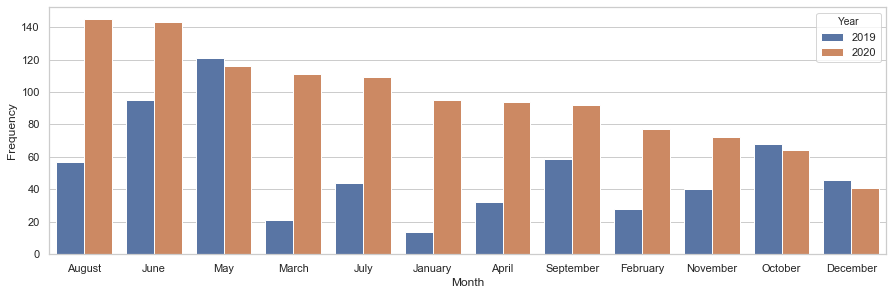

In [16]:
sns.set_style('whitegrid')
by_year = my_history.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=by_year["Month"], y=by_year["Frequency"], hue=by_year["Year"])

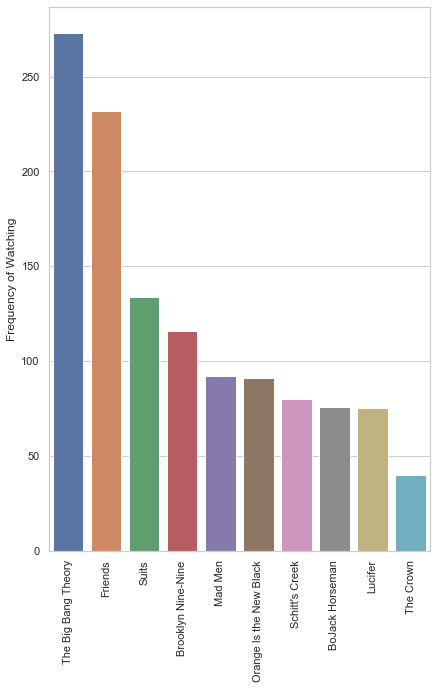

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
ax = sns.barplot(x=my_history['show_name'].sort_values(ascending=True).value_counts().index[:10], 
                 y=my_history["show_name"].sort_values(ascending=True).value_counts()[:10],)
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
plt.savefig('05-mostwatched.png')

Text(0, 0.5, 'Frequency')

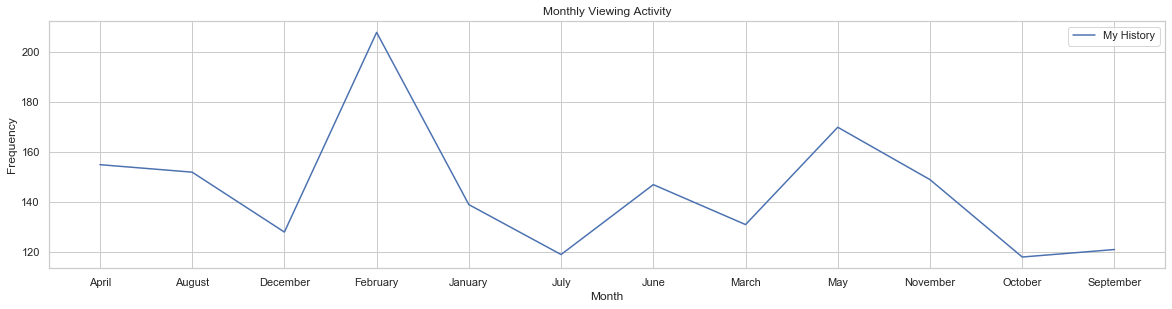

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)

ax = sns.lineplot(x=my_history["Month"].value_counts().index, y=my_history["Month"].value_counts(), label="My History")
plt.title("Monthly Viewing Activity")
plt.xlabel("Month")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

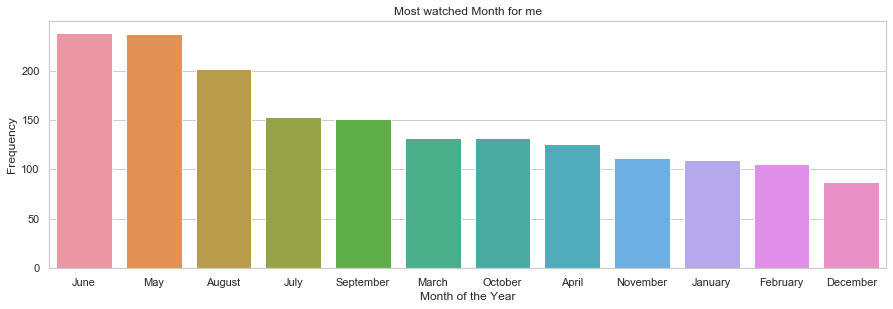

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=my_history["Month"].value_counts().index, y=my_history["Month"].value_counts())
plt.title("Most watched Month for me")
plt.xlabel("Month of the Year")
plt.ylabel("Frequency")
